In [1]:
# Shengping Jiang 12.5 capstone submission

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./input/great_pyrenees_86.jpg
./input/leonberger_54.jpg
./input/japanese_chin_149.jpg
./input/american_bulldog_8.jpg
./input/Maine_Coon_23.jpg
./input/chihuahua_23.jpg
./input/newfoundland_165.jpg
./input/american_bulldog_122.jpg
./input/Ragdoll_83.jpg
./input/great_pyrenees_1.jpg
./input/japanese_chin_186.jpg
./input/samoyed_189.jpg
./input/american_bulldog_61.jpg
./input/Birman_105.jpg
./input/great_pyrenees_80.jpg
./input/great_pyrenees_20.jpg
./input/japanese_chin_84.jpg
./input/basset_hound_119.jpg
./input/miniature_pinscher_142.jpg
./input/saint_bernard_95.jpg
./input/american_pit_bull_terrier_81.jpg
./input/great_pyrenees_156.jpg
./input/basset_hound_110.jpg
./input/Russian_Blue_30.jpg
./input/Russian_Blue_136.jpg
./input/pug_81.jpg
./input/pug_150.jpg
./input/British_Shorthair_172.jpg
./input/leonberger_142.jpg
./input/Egyptian_Mau_8.jpg
./input/Siamese_53.jpg
./input/Ragdoll_135.jpg
./input/Bengal_117.jpg
./input/Maine_Coon_71.jpg
./input/British_Shorthair_92.jpg
./input/ameri

./input/english_cocker_spaniel_174.jpg
./input/Maine_Coon_72.jpg
./input/Siamese_28.jpg
./input/Birman_85.jpg
./input/pug_148.jpg
./input/american_pit_bull_terrier_173.jpg
./input/miniature_pinscher_74.jpg
./input/Egyptian_Mau_123.jpg
./input/British_Shorthair_124.jpg
./input/scottish_terrier_106.jpg
./input/samoyed_47.jpg
./input/japanese_chin_27.jpg
./input/Abyssinian_148.jpg
./input/english_setter_176.jpg
./input/staffordshire_bull_terrier_39.jpg
./input/pug_129.jpg
./input/Maine_Coon_3.jpg
./input/american_pit_bull_terrier_149.jpg
./input/British_Shorthair_108.jpg
./input/Birman_93.jpg
./input/British_Shorthair_197.jpg
./input/wheaten_terrier_173.jpg
./input/shiba_inu_23.jpg
./input/newfoundland_183.jpg
./input/British_Shorthair_115.jpg
./input/Maine_Coon_145.jpg
./input/Ragdoll_49.jpg
./input/samoyed_26.jpg
./input/yorkshire_terrier_49.jpg
./input/Siamese_31.jpg
./input/pug_24.jpg
./input/Bengal_94.jpg
./input/keeshond_127.jpg
./input/staffordshire_bull_terrier_106.jpg
./input/yor

./input/samoyed_194.jpg
./input/Persian_196.jpg
./input/Persian_131.jpg
./input/havanese_56.jpg
./input/american_bulldog_95.jpg
./input/Abyssinian_5.jpg
./input/boxer_41.jpg
./input/basset_hound_97.jpg
./input/english_setter_164.jpg
./input/pug_77.jpg
./input/pomeranian_71.jpg
./input/samoyed_99.jpg
./input/chihuahua_93.jpg
./input/British_Shorthair_207.jpg
./input/german_shorthaired_54.jpg
./input/english_setter_36.jpg
./input/Bombay_214.jpg
./input/Abyssinian_26.jpg
./input/great_pyrenees_62.jpg
./input/english_cocker_spaniel_76.jpg
./input/english_setter_79.jpg
./input/pug_136.jpg
./input/British_Shorthair_82.jpg
./input/chihuahua_1.jpg
./input/scottish_terrier_150.jpg
./input/basset_hound_28.jpg
./input/yorkshire_terrier_50.jpg
./input/basset_hound_60.jpg
./input/British_Shorthair_57.jpg
./input/keeshond_32.jpg
./input/miniature_pinscher_70.jpg
./input/english_setter_63.jpg
./input/english_cocker_spaniel_134.jpg
./input/wheaten_terrier_24.jpg
./input/Bombay_58.jpg
./input/Egyptian_

In [6]:
import os
import cv2
from PIL import Image
import time
import copy
import warnings
import random
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import functional as F
import torchvision
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader, Dataset, sampler
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from albumentations import (HorizontalFlip,VerticalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise,RandomRotate90,Transpose,RandomBrightnessContrast,RandomCrop)
from albumentations.pytorch import ToTensor
import albumentations as albu
import matplotlib.image as mpi
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore")
seed = 69
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True


In [7]:
path = "./input/British_Shorthair_95.jpg"

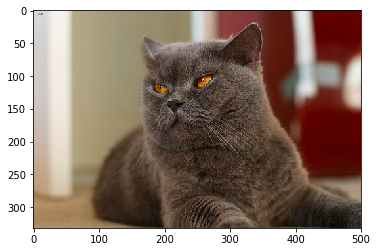

In [8]:
img = plt.imread(path)
plt.imshow(img)

In [9]:
import re
pat = r'/([^/]+)_\d+.jpg$'
breed = re.findall(pat,string="./input/British_Shorthair_95.jpg")

In [10]:
path_list = []
breed_list = []
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        path = os.path.join(dirname,filename)
        breed = re.findall(pat,string = path)
        if len(breed)>0:
            img = plt.imread(path)
            if len(img.shape)==3:
                if img.shape[2]==3:
                    path_list.append(path)
                    breed_list.append(breed[0])
        

In [11]:
labels = pd.DataFrame({'label_id':path_list,'breed':breed_list})

In [12]:
labels.head()

,label_id,breed
0,./input/great_pyrenees_86.jpg,great_pyrenees
1,./input/leonberger_54.jpg,leonberger
2,./input/japanese_chin_149.jpg,japanese_chin
3,./input/american_bulldog_8.jpg,american_bulldog
4,./input/Maine_Coon_23.jpg,Maine_Coon


In [13]:
classes = labels['breed'].unique()

In [14]:
classes

array(['great_pyrenees', 'leonberger', 'japanese_chin',
       'american_bulldog', 'Maine_Coon', 'chihuahua', 'newfoundland',
       'Ragdoll', 'samoyed', 'Birman', 'basset_hound',
       'miniature_pinscher', 'saint_bernard', 'american_pit_bull_terrier',
       'Russian_Blue', 'pug', 'British_Shorthair', 'Egyptian_Mau',
       'Siamese', 'Bengal', 'Abyssinian', 'wheaten_terrier',
       'staffordshire_bull_terrier', 'keeshond', 'Persian', 'boxer',
       'scottish_terrier', 'pomeranian', 'yorkshire_terrier',
       'english_cocker_spaniel', 'shiba_inu', 'Bombay',
       'german_shorthaired', 'english_setter', 'beagle', 'havanese',
       'Sphynx'], dtype=object)

In [15]:
len(classes)

37

In [21]:
labels.shape

(7378, 2)

In [17]:
df1 = labels['breed']
df2 = labels["label_id"]
df1 = pd.get_dummies(df1)
df = pd.concat([df2,df1], axis=1)
df.head()

,label_id,Abyssinian,Bengal,Birman,Bombay,British_Shorthair,Egyptian_Mau,Maine_Coon,Persian,Ragdoll,...,newfoundland,pomeranian,pug,saint_bernard,samoyed,scottish_terrier,shiba_inu,staffordshire_bull_terrier,wheaten_terrier,yorkshire_terrier
0,./input/great_pyrenees_86.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,./input/leonberger_54.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,./input/japanese_chin_149.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,./input/american_bulldog_8.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,./input/Maine_Coon_23.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.shape

(7378, 38)

In [19]:
train_df,test_df = train_test_split(df,test_size=0.2,random_state=85)

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [38]:
class DogandCat(Dataset):
    
    def __init__(self,df,phase):
        self.phase = phase
        self.df = df        
        if phase == 'train':
            self.transforms = albu.Compose([
               albu.SmallestMaxSize(256),
               albu.RandomCrop(256,256),
                albu.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
                ToTensor()
            ])
        elif phase == 'val':
            self.transforms = albu.Compose([
                albu.Resize(256,256),
                albu.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
                ToTensor()
            ])
        
    def __len__(self): 
        return len(self.df)
    
    def __getitem__(self,index):
        label = self.df.iloc[index,1:]
        label = label.to_numpy()
        label = np.argmax(label)
        path = self.df.iloc[index,0]
        img = plt.imread(path)
        img = self.transforms(image = np.array(img))
        img = img['image']
        
        return img,label

In [39]:
traindata = DogandCat(train_df,phase="train")
valdata = DogandCat(test_df,phase="val")

In [40]:
trainloader = DataLoader(traindata,batch_size=16)
valloader = DataLoader(valdata,batch_size = 16)

In [41]:
dataiter = iter(trainloader)
img,label = dataiter.next()

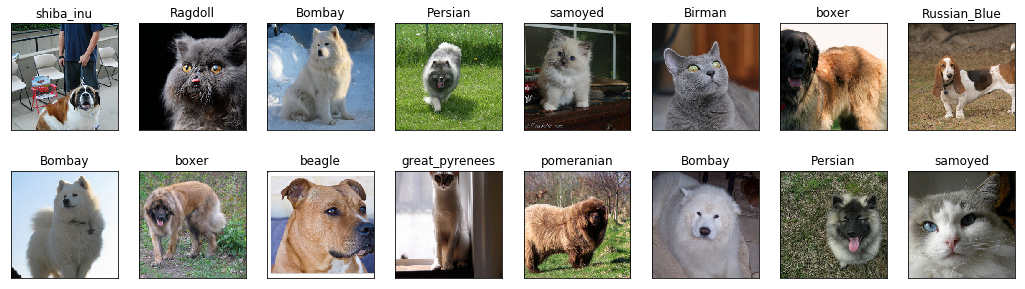

In [42]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
def im_show(img):
    npimg = img.numpy().transpose((1,2,0))*std + mean
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(npimg)
fig = plt.figure(figsize=(18,5))

for i in np.arange(16):
    ax = fig.add_subplot(2,8,i+1,xticks=[],yticks=[])
    im_show(img[i])
    ax.set_title(classes[label[i]])


In [43]:
from torchvision import models
resnet = models.resnet18(pretrained=True,progress = True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/simon/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [44]:
for param in resnet.parameters():
    param.requires_grad=False
fc_inputs = resnet.fc.in_features
resnet.fc = nn.Linear(fc_inputs,37)

In [45]:
from torch.optim import lr_scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(), lr=0.001, betas=(0.9, 0.999),weight_decay=0.001)
scheduler = ReduceLROnPlateau(optimizer,factor=0.33, mode="min", patience=2)

In [46]:
def train_model(dataloaders,model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()
    dataset_sizes = {'train': len(dataloaders['train'].dataset), 
                     'val': len(dataloaders['val'].dataset)}
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    number_of_iter = 0
    acc_train = []
    acc_val = []
    loss_train = []
    loss_val = []
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  
            else:
                model.eval()   

            current_loss = 0.0
            current_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                current_loss += loss.item() * inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)

            epoch_loss = current_loss / dataset_sizes[phase]
            epoch_acc = current_corrects.double() / dataset_sizes[phase]
            if phase=="train":
                acc_train.append(epoch_acc)
                loss_train.append(epoch_loss)
            else:
                acc_val.append(epoch_acc)
                loss_val.append(epoch_loss)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(),'best_weights.pth')
                torch.save(optimizer.state_dict(), 'optimizer.pth')

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    model.load_state_dict(best_model_wts)
    
    
    return model,acc_val,acc_train,loss_train,loss_val

In [ ]:
resnet = resnet.to(device)
dataloaders = {"train":trainloader,"val":valloader}
num_epochs=10
start_time = time.time()
model,acc_val,acc_train,loss_train,loss_val = train_model(dataloaders, resnet, criterion, optimizer, scheduler, num_epochs=num_epochs)

Epoch 0/9
train Loss: 1.3647 Acc: 0.6837
val Loss: 0.5491 Acc: 0.8523

Epoch 1/9
train Loss: 0.5181 Acc: 0.8694
val Loss: 0.3939 Acc: 0.8774

Epoch 2/9


In [ ]:
epoch = []
for x in range(num_epochs):
    epoch.append(x)
plt.style.use('dark_background')
fig = plt.figure(figsize = (12,5))
plt.plot(epoch,loss_train,label = 'TrainLoss',color = 'blue')
plt.plot(epoch,loss_val,label = 'ValLoss',color = 'red')
plt.xlabel('No.of Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
labels.to_csv('labels',index = False)